<a href="https://colab.research.google.com/github/Just-Louder/CSC481HomeworkNO/blob/main/Louder_La'Shawn_Week_5_Activity_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [27]:
data = pd.read_csv("gila_river.csv")

In [28]:
data.head()

,y(t-1),y(t-2),y(t-3),y
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [29]:
data.shape

(1034, 4)

In [30]:
X = data.drop(columns=['y'])
y = data['y']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
mlp = MLPRegressor(hidden_layer_sizes= (10,5), max_iter = 3000)

In [34]:
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=3000)

In [35]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [36]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [37]:
print(f"Training MSE: {mse_train}")
print(f"Training MSE: {mse_test}")

Training MSE: 96109.15288467144
Training MSE: 21841.05642656463


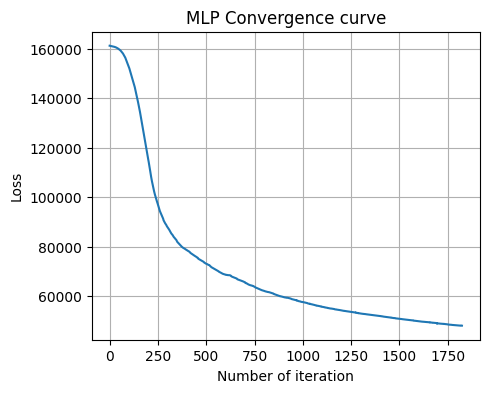

In [38]:
plt.figure(figsize=(5,4))
plt.plot(mlp.loss_curve_)
plt.title("MLP Convergence curve")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.grid("True")

plt.show()

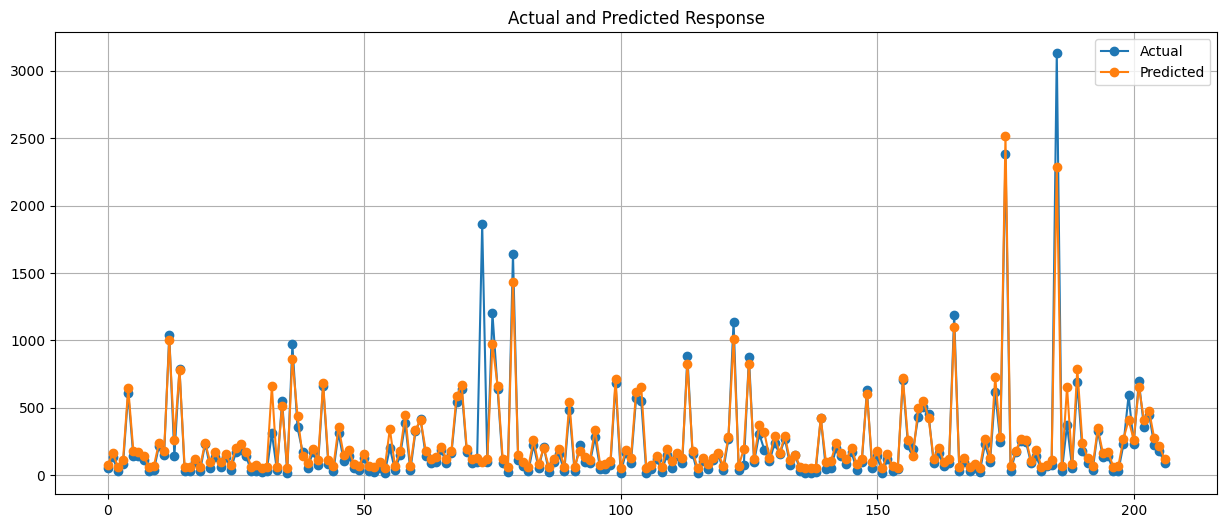

In [39]:
t = range(len(y_test))

plt.figure(figsize=(15,6))
plt.plot(t,y_test,label='Actual', linestyle = '-', marker = 'o')
plt.plot(t,y_test_pred,label='Predicted', linestyle = '-', marker = 'o')
plt.title('Actual and Predicted Response')

plt.legend()
plt.grid(True)

plt.show()

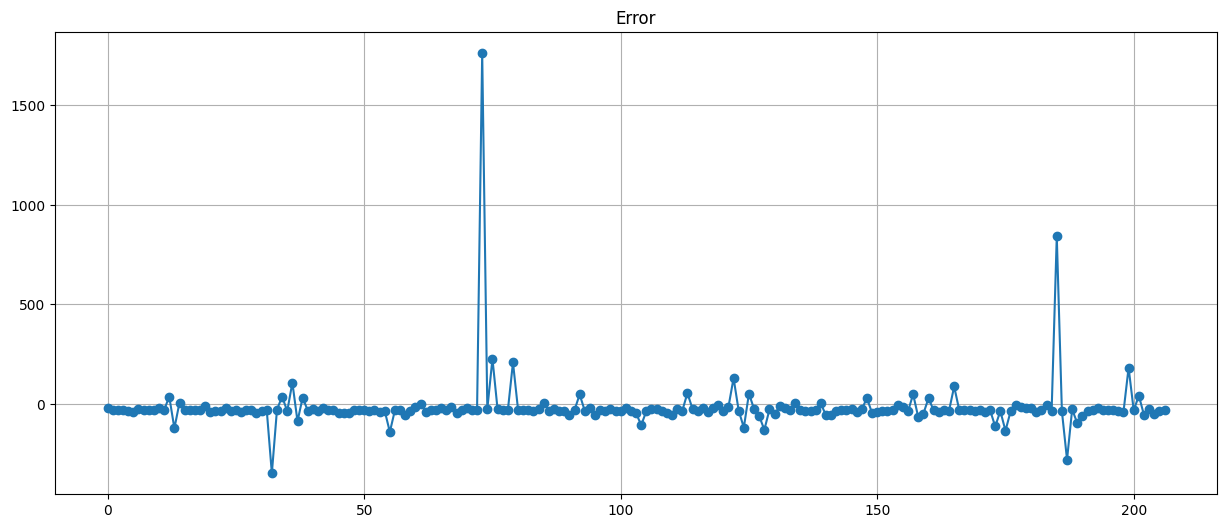

In [40]:
t = range(len(y_test))

plt.figure(figsize=(15,6))
plt.plot(t,y_test-y_test_pred,label='Actual', linestyle = '-', marker = 'o')
plt.title('Error')

#plt.legend()
plt.grid(True)

plt.show()

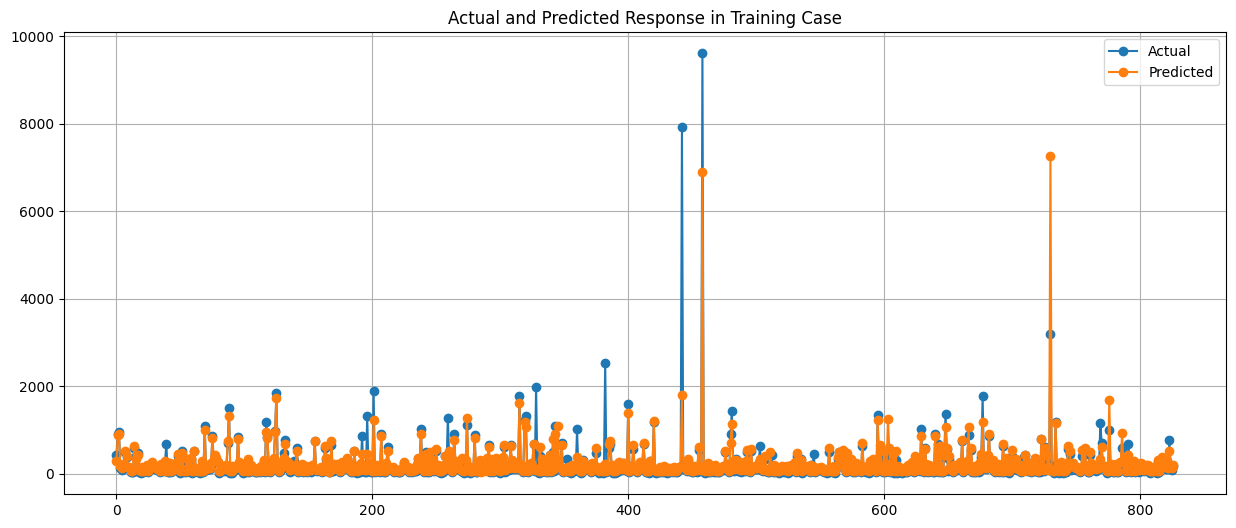

In [41]:
t = range(len(y_train))

plt.figure(figsize=(15,6))
plt.plot(t,y_train,label='Actual', linestyle = '-', marker = 'o')
plt.plot(t,y_train_pred,label='Predicted', linestyle = '-', marker = 'o')
plt.title('Actual and Predicted Response in Training Case')

plt.legend()
plt.grid(True)

plt.show()